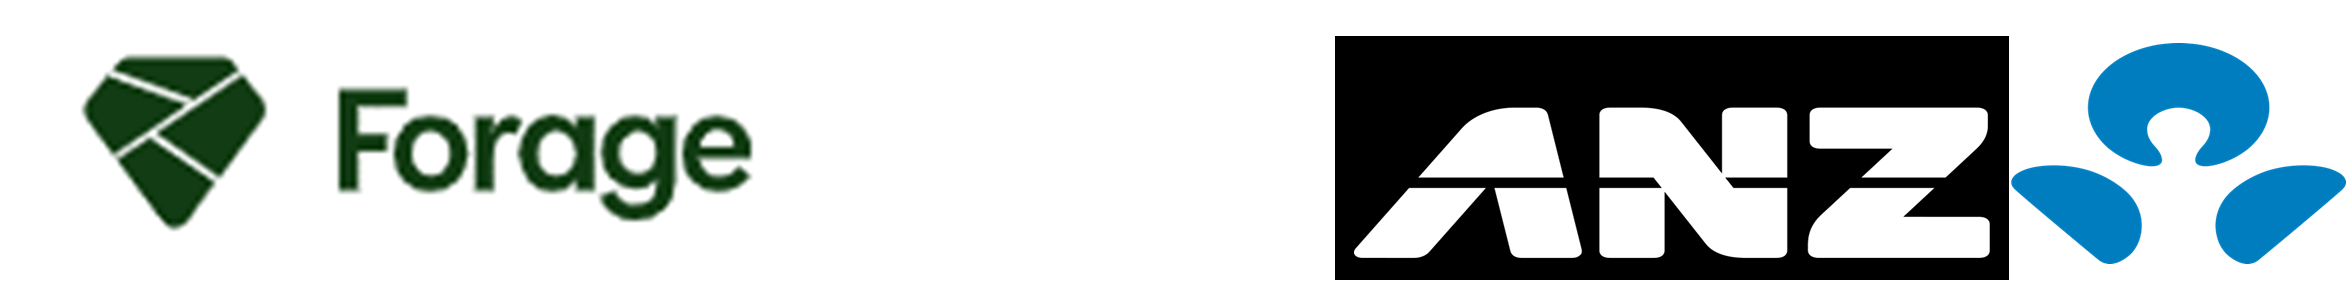

## Forage data internship 

Name: Soyinka 'Sho' Sowoolu

email: soyinkas1@gmail.com

## ANZ- Predictive Analytics (Mandatory Task)

### <u>Background Information</u>

This task is based on a synthesised transaction dataset containing 3 months’ worth of transactions for 100 hypothetical customers. It contains purchases, recurring transactions, and salary transactions.

Using the same transaction dataset, identify the annual salary for each customer

Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

Build a simple regression model to predict the annual salary for each customer using the attributes you identified above
How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?


#### <u>Work plan</u>

There are three main parts to the task from the above:


A. <i><b>Import all the required libraries and import the main dataset</b></i>


B. <i><b>Identify the annual salary and explore correlation between annual salary and various customer attributes</b></i>

    1. Extract the salary transactions from each data set
    2. Create a column for annual salary and calculate this from monthly salary
    3. Create additional columns by feature engineering (library for this?) e.g. average merchant purchases per month, average other purchase per month
    4.Check correlation with derived features , age, location, with scatter plot and heatmap
    
    
C. <i><b>Build a simple regression model</b></i>

    5. Use the customer ID as index and annual salary as labels
    6. Split data into training and test sets (use cross-validation?)
    7. Fit the data to a simple linear regression model and check the accuracy
    8. Improve the model by tuning hyperparameters (RandomSearchCV and/or GridSearchCV)
    9. Select model with the best accuracy
    
D.<i><b>Build a decision tree model to predict salary</b></i>

    10. Use RandomForest as the decision tree based model to compare the with the simple linear regression model.


    

### A. Import all the required libraries and import the main dataset

In [1]:
# Import the required python libraries
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [30]:
# Import the main dataset
df = pd.read_excel('ANZ synthesised transaction dataset.xlsx')
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [31]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

### B. Identify the annual salary and explore correlation between annual salary and various customer attributes

In [3]:
# Create a DataFrame with the salary transactions only
df_salary =df[df['txn_description']=='PAY/SALARY']
df_salary

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
50,posted,NaN,0,ACC-588564840,AUD,151.27 -33.76,PAY/SALARY,NaN,0.0,Isaiah,...,23,NaN,NaN,2018-08-01T11:00:00.000+0000,3903.95,9ca281650e5d482d9e53f85e959baa66,Australia,CUS-1462656821,NaN,credit
61,posted,NaN,0,ACC-1650504218,AUD,145.01 -37.93,PAY/SALARY,NaN,0.0,Marissa,...,23,NaN,NaN,2018-08-01T12:00:00.000+0000,1626.48,1822eb0e1bbe4c9e95ebbb0fa2cc4323,Australia,CUS-2500783281,NaN,credit
64,posted,NaN,0,ACC-3326339947,AUD,151.18 -33.80,PAY/SALARY,NaN,0.0,Eric,...,22,NaN,NaN,2018-08-01T12:00:00.000+0000,983.36,bd62b1799a454cedbbb56364f7c40cbf,Australia,CUS-326006476,NaN,credit
68,posted,NaN,0,ACC-3541460373,AUD,145.00 -37.83,PAY/SALARY,NaN,0.0,Jeffrey,...,24,NaN,NaN,2018-08-01T13:00:00.000+0000,1408.08,0d95c7c932bb48e5b44c2637bdd3efe9,Australia,CUS-1433879684,NaN,credit
70,posted,NaN,0,ACC-2776252858,AUD,144.95 -37.76,PAY/SALARY,NaN,0.0,Kristin,...,43,NaN,NaN,2018-08-01T13:00:00.000+0000,1068.04,f50ccf1195214d14a0acbfcb5a265193,Australia,CUS-4123612273,NaN,credit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,posted,NaN,0,ACC-1973887809,AUD,115.78 -31.90,PAY/SALARY,NaN,0.0,Antonio,...,26,NaN,NaN,2018-10-31T16:00:00.000+0000,1098.91,0e6cffb4401043c891ab7a50ec594208,Australia,CUS-1646621553,NaN,credit
12000,posted,NaN,0,ACC-819621312,AUD,145.04 -37.85,PAY/SALARY,NaN,0.0,Michele,...,30,NaN,NaN,2018-10-31T17:00:00.000+0000,1158.15,ad13e06fffba4771b3c994f9147e68c0,Australia,CUS-1271030853,NaN,credit
12001,posted,NaN,0,ACC-2920611728,AUD,144.96 -37.76,PAY/SALARY,NaN,0.0,Tyler,...,69,NaN,NaN,2018-10-31T17:00:00.000+0000,1043.12,14a1604e6ead4b54b65d7a28ec546a69,Australia,CUS-1388323263,NaN,credit
12003,posted,NaN,0,ACC-1799207998,AUD,150.68 -33.79,PAY/SALARY,NaN,0.0,Susan,...,20,NaN,NaN,2018-10-31T17:00:00.000+0000,1395.49,cd1b1dea1d2f43e882d3499b3717d23b,Australia,CUS-164374203,NaN,credit


In [5]:
# Group by 'customer_id' to get the total salary for each customer for the 3 months of transactions
df_salary.groupby('customer_id')['amount'].sum()

customer_id
CUS-1005756958    12616.11
CUS-1117979751    25050.55
CUS-1140341822    11499.06
CUS-1147642491    22248.07
CUS-1196156254    27326.11
                    ...   
CUS-72755508       8703.84
CUS-809013380     13481.91
CUS-860700529     10851.72
CUS-880898248      8603.88
CUS-883482547     27842.22
Name: amount, Length: 100, dtype: float64

In [8]:
# Confirm the salary frequency by inspecting just one of the customers
df_salary[df_salary['customer_id']=='CUS-1005756958']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
841,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-08-07T16:00:00.000+0000,970.47,33c2b30f5b064710a53a45ef89460e16,Australia,CUS-1005756958,NaN,credit
1744,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-08-14T16:00:00.000+0000,970.47,deaff82de78840f08a035e5404ce5e29,Australia,CUS-1005756958,NaN,credit
2530,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-08-21T16:00:00.000+0000,970.47,71cd874fc20741f8b4a589c8286afeb2,Australia,CUS-1005756958,NaN,credit
3464,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-08-28T16:00:00.000+0000,970.47,9bcd1945ef0a43b5a59d0ba2cf2ee4df,Australia,CUS-1005756958,NaN,credit
4402,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-09-04T16:00:00.000+0000,970.47,e588bd113b3645ee82fb386e336c42a1,Australia,CUS-1005756958,NaN,credit
5328,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-09-11T16:00:00.000+0000,970.47,27e8d534b0ef4aa5857e4d56dc1cdda2,Australia,CUS-1005756958,NaN,credit
6271,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-09-18T16:00:00.000+0000,970.47,6b622e0b12324ac2a1b6c946f43bce04,Australia,CUS-1005756958,NaN,credit
7203,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-09-25T16:00:00.000+0000,970.47,a519227ab3e848b898e2e105ee078bdf,Australia,CUS-1005756958,NaN,credit
8142,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-10-02T16:00:00.000+0000,970.47,6a0796f6e44c4d49b288a593bdc23503,Australia,CUS-1005756958,NaN,credit
9072,posted,NaN,0,ACC-2828321672,AUD,153.03 -27.51,PAY/SALARY,NaN,0.0,Stephanie,...,53,NaN,NaN,2018-10-09T16:00:00.000+0000,970.47,8e0fb2a9850a4ed884b4ccd5a3873693,Australia,CUS-1005756958,NaN,credit


> From above the salary is on a weekly basis. We will double check by sampling another customer

In [9]:
# Reconfirm the salary frequency by inspecting another customer
df_salary[df_salary['customer_id']=='CUS-809013380']

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
827,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-08-07T14:00:00.000+0000,1037.07,b1377c1b408b4729a38cc96b4a528ca1,Australia,CUS-809013380,NaN,credit
1732,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-08-14T14:00:00.000+0000,1037.07,6f9ab08a03db4e3888b0023984ced9f0,Australia,CUS-809013380,NaN,credit
2516,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-08-21T14:00:00.000+0000,1037.07,db340e81757c479285ce999d234ac857,Australia,CUS-809013380,NaN,credit
3453,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-08-28T14:00:00.000+0000,1037.07,41e48fca189b46b78001e98a8a74d11c,Australia,CUS-809013380,NaN,credit
4388,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-09-04T14:00:00.000+0000,1037.07,83552d789d9f407b80117b6de437cfe4,Australia,CUS-809013380,NaN,credit
5315,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-09-11T14:00:00.000+0000,1037.07,d0c9f31a2afe49368c2f82864a322203,Australia,CUS-809013380,NaN,credit
6257,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-09-18T14:00:00.000+0000,1037.07,26b953d7fcf84aca8d847355553bda5d,Australia,CUS-809013380,NaN,credit
7189,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-09-25T14:00:00.000+0000,1037.07,7248e68d380a4dc08dc08298438ff686,Australia,CUS-809013380,NaN,credit
8129,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-10-02T14:00:00.000+0000,1037.07,21219ec8542b448b9bed5eafcaa98d64,Australia,CUS-809013380,NaN,credit
9060,posted,NaN,0,ACC-1990648130,AUD,114.62 -28.80,PAY/SALARY,NaN,0.0,Kaitlyn,...,21,NaN,NaN,2018-10-09T14:00:00.000+0000,1037.07,f37fbb68bddf4cf3b847cebdcd210388,Australia,CUS-809013380,NaN,credit


> We will extract the weekly salary for each customer and multiply by 52 weeks to get the annual salary. A new annual salary column will be added to the main dataset.

In [20]:
# Calculate the 3 months total salary and pass to a DataFrame
df_sal_total =pd.DataFrame(df_salary.groupby('customer_id')['amount'].sum())
df_sal_total

,amount
customer_id,
CUS-1005756958,12616.11
CUS-1117979751,25050.55
CUS-1140341822,11499.06
CUS-1147642491,22248.07
CUS-1196156254,27326.11
...,...
CUS-72755508,8703.84
CUS-809013380,13481.91
CUS-860700529,10851.72


In [23]:
# Calculate the annual salary and create a column for this 
df_sal_total['annual salary'] =(df_sal_total['amount']/13)*52

# Drop the 3 months total amount
df_sal_total.drop('amount',axis=1,inplace=True)

#DataFrame with annual salary
df_sal_total

,annual salary
customer_id,
CUS-1005756958,50464.44
CUS-1117979751,100202.20
CUS-1140341822,45996.24
CUS-1147642491,88992.28
CUS-1196156254,109304.44
...,...
CUS-72755508,34815.36
CUS-809013380,53927.64
CUS-860700529,43406.88


In [32]:
# We will create features representing transaction behaviours e.g. average purchase amount from merchants, average amount-other expenses and average balance on account 

# Create a Dataframe for merchant transaction only(card transactions)
df_merchants=df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')]

# Create a DataFrame for transactions by the customer directly (without merchants and salary)
df_cust_only=df[(df['txn_description']=='PAYMENT') | 
                (df['txn_description']=='INTER BANK')| 
                (df['txn_description']=='PHONE BANK')]


In [48]:
# Create a DataFrame for average amount spent on purchases with merchants
df_mer_avg=pd.DataFrame(df_merchants.groupby('customer_id')['amount'].mean())

# name columns with appropriate description
df_mer_avg.rename(columns={'amount':'avg_mer_spend'},inplace=True)
df_mer_avg

,avg_mer_spend
customer_id,
CUS-1005756958,37.726250
CUS-1117979751,76.458077
CUS-1140341822,67.531385
CUS-1147642491,51.128289
CUS-1196156254,30.310491
...,...
CUS-72755508,34.545111
CUS-809013380,27.297500
CUS-860700529,29.044466


In [49]:
# Create a DataFrame for average amount spent on other expenses 
df_othexp_avg=pd.DataFrame(df_cust_only.groupby('customer_id')['amount'].mean())

# name columns with appropriate description
df_othexp_avg.rename(columns={'amount':'avg_othexp_spend'},inplace=True)
df_othexp_avg

,avg_othexp_spend
customer_id,
CUS-1005756958,153.500000
CUS-1117979751,120.926829
CUS-1140341822,124.666667
CUS-1147642491,98.172414
CUS-1196156254,50.453333
...,...
CUS-72755508,1180.000000
CUS-809013380,127.217391
CUS-860700529,60.238095


In [93]:
# Create a DataFrame for average balance spent on customer's account
df_bal_avg=pd.DataFrame(df_cust_only.groupby('customer_id')['balance'].mean())

# name columns with appropriate description
df_bal_avg.rename(columns={'balance':'avg_bal'},inplace=True)
df_bal_avg

,avg_bal
customer_id,
CUS-1005756958,4187.891667
CUS-1117979751,10601.552683
CUS-1140341822,5334.007778
CUS-1147642491,8321.411724
CUS-1196156254,22766.256933
...,...
CUS-72755508,5227.940000
CUS-809013380,4680.580435
CUS-860700529,3254.679048


In [50]:
# Other attribute we will look at is the age and location of the customer.
# Get the age of each customer
df_age=pd.DataFrame(df.groupby('customer_id')['age'].mean())
df_age

,age
customer_id,
CUS-1005756958,53.0
CUS-1117979751,21.0
CUS-1140341822,28.0
CUS-1147642491,34.0
CUS-1196156254,34.0
...,...
CUS-72755508,35.0
CUS-809013380,21.0
CUS-860700529,30.0


In [72]:
# Get the location of each customer 
df_cust_loc= pd.DataFrame(df.groupby(['customer_id','long_lat']).count())

In [74]:
df_cust_loc.reset_index(level='long_lat',inplace=True)
df_cust_loc=df_cust_loc.loc[:,['long_lat']]
df_cust_loc

,long_lat
customer_id,
CUS-1005756958,153.03 -27.51
CUS-1117979751,115.81 -31.82
CUS-1140341822,144.97 -37.42
CUS-1147642491,151.04 -33.77
CUS-1196156254,138.52 -35.01
...,...
CUS-72755508,150.62 -33.76
CUS-809013380,114.62 -28.80
CUS-860700529,153.05 -27.61


In [75]:
# We will split the coordinates into seperate longitude and latitude and also convert this to numbers from current object datatype

# Split the 'long_lat'column into 'long' and 'lat' 
df_cust_loc[['c_long','c_lat']] = df_cust_loc['long_lat'].str.split(" ",expand=True,)

# Convert the columns to float
df_cust_loc[['c_long','c_lat']]=df_cust_loc[['c_long','c_lat']].astype('float64')
df_cust_loc[['c_long','c_lat']].dtypes

c_long    float64
c_lat     float64
dtype: object

In [77]:
# remove the long_lat column
df_cust_loc.drop('long_lat',axis=1,inplace=True)
df_cust_loc

,c_long,c_lat
customer_id,,
CUS-1005756958,153.03,-27.51
CUS-1117979751,115.81,-31.82
CUS-1140341822,144.97,-37.42
CUS-1147642491,151.04,-33.77
CUS-1196156254,138.52,-35.01
...,...,...
CUS-72755508,150.62,-33.76
CUS-809013380,114.62,-28.80
CUS-860700529,153.05,-27.61


In [89]:
# We will create a DataFrame of the gender of the customer
# Get the location of each customer 
df_cust_sex= pd.DataFrame(df.groupby(['customer_id','gender']).count())

# make gender index a column 
df_cust_sex.reset_index(level='gender',inplace=True)
# Drop all other columns except gender
df_cust_sex=df_cust_sex.loc[:,['gender']]
df_cust_sex

,gender
customer_id,
CUS-1005756958,F
CUS-1117979751,M
CUS-1140341822,M
CUS-1147642491,F
CUS-1196156254,F
...,...
CUS-72755508,F
CUS-809013380,F
CUS-860700529,M


In [90]:
# Convert the gender to numeric by making Male =1 and Female = 0
df_cust_sex['gender'] = np.where(df_cust_sex['gender'] == 'F', 0, 1)
df_cust_sex

,gender
customer_id,
CUS-1005756958,0
CUS-1117979751,1
CUS-1140341822,1
CUS-1147642491,0
CUS-1196156254,0
...,...
CUS-72755508,0
CUS-809013380,0
CUS-860700529,1


> We can now conbine all the dataframe into a single DataFrame using the following
>* df_sal_total
>* df_cust_loc df_mer_avg
>* df_age
>* df_othexp_avg
>* df_cust_sexm
>* df_bal_avg


In [96]:
# Combined DataFrame with attributes of each customer.
df_cust_info = [df_age, df_cust_sex,df_cust_loc, df_mer_avg,df_othexp_avg,df_bal_avg,df_sal_total]

df_cust_info = pd.concat(df_cust_info, join='outer', axis = 1) 
df_cust_info

,age,gender,c_long,c_lat,avg_mer_spend,avg_othexp_spend,avg_bal,annual salary
customer_id,,,,,,,,
CUS-1005756958,53.0,0,153.03,-27.51,37.726250,153.500000,4187.891667,50464.44
CUS-1117979751,21.0,1,115.81,-31.82,76.458077,120.926829,10601.552683,100202.20
CUS-1140341822,28.0,1,144.97,-37.42,67.531385,124.666667,5334.007778,45996.24
CUS-1147642491,34.0,0,151.04,-33.77,51.128289,98.172414,8321.411724,88992.28
CUS-1196156254,34.0,0,138.52,-35.01,30.310491,50.453333,22766.256933,109304.44
...,...,...,...,...,...,...,...,...
CUS-72755508,35.0,0,150.62,-33.76,34.545111,1180.000000,5227.940000,34815.36
CUS-809013380,21.0,0,114.62,-28.80,27.297500,127.217391,4680.580435,53927.64
CUS-860700529,30.0,1,153.05,-27.61,29.044466,60.238095,3254.679048,43406.88


In [100]:
# Confirm there are no missing values
df_cust_info.isna().sum()

age                 0
gender              0
c_long              0
c_lat               0
avg_mer_spend       0
avg_othexp_spend    0
avg_bal             0
annual salary       0
dtype: int64

In [103]:
# Save the DataFrame for future use
df_cust_info.to_excel('anz customer atributes.xlsx',float_format='%.3f')

>Check the correlation of the different attributes using scatter diagram

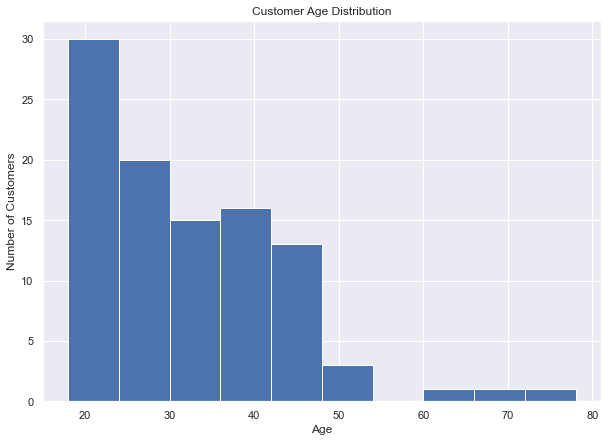

In [121]:
# Plot histogram of the customer age distribution
plt.figure(figsize=(10,7))
plt.hist(df_cust_info['age']);
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.title('Customer Age Distribution');

Majority of the customer are below 50 years.

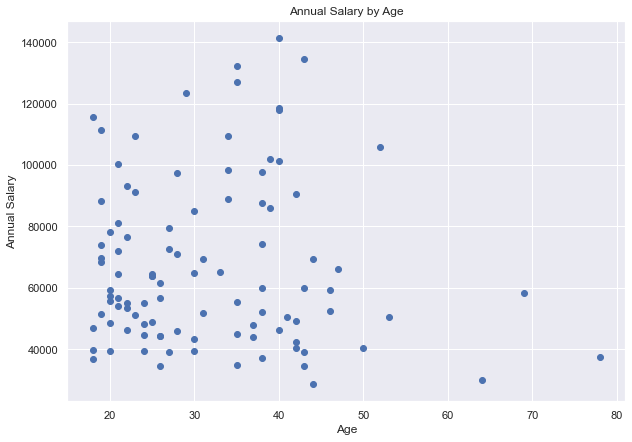

In [122]:
# Plot a scatter diagram of the annual salary and age
plt.figure(figsize=(10,7))
plt.scatter(df_cust_info['age'],df_cust_info['annual salary'])
plt.xlabel('Age')
plt.ylabel('Annual Salary')
plt.title('Annual Salary by Age');

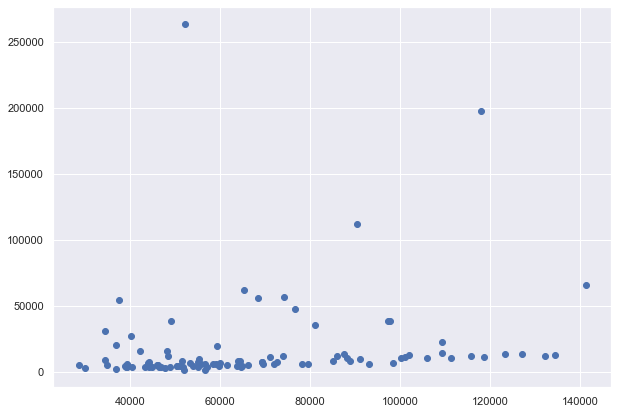

In [119]:
# Plot a scatter diagram of the annual salary and average balance
plt.figure(figsize=(10,7))
plt.scatter(df_cust_info['annual salary'],df_cust_info['avg_bal'])
plt.xlabel('Annual Salary')
plt.ylabel('Average Balance')
plt.title('Annual Salary and Average Balance');

>There seems to be a very weak positive correlation between annual salary and average balance

In [123]:
# Plot a scatter diagram of the annual salary and location
import plotly.express as px
fig = px.scatter_geo(df_cust_info,lat='c_lat',lon='c_long', hover_name=df_cust_info.index,color="annual salary")
fig.update_layout(title = "Annual Salary by Location", title_x=0.2)
fig.show()

>There seem not be any strong linear correlation with the attributes and annual salary. We can confirm thsi holistically by checking the features correlation

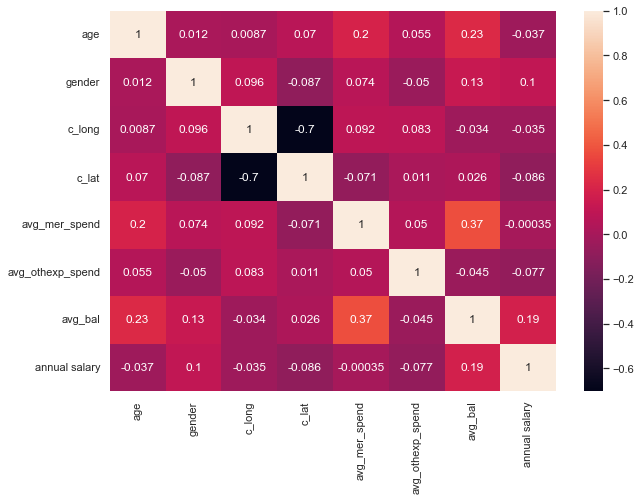

In [124]:
# Let's check out a correlation matrix
sns.set(rc={'figure.figsize':(10,7)})
sns.heatmap(df_cust_info.corr(),annot=True);

>This shows there is not much correlation whether positive or negative to the annual salary as mentioned above

### C. Build a simple regression model

    5. Use the customer ID as index and annual salary as labels
    6. Split data into training and test sets (use cross-validation?)
    7. Fit the data to a simple linear regression model and check the accuracy
    8. Improve the model by tuning hyperparameters (RandomSearchCV and/or GridSearchCV)
    9. Select model with the best accuracy

**We will use the scikit-learn library to train a linear regression model.**

The following will be the evaluation metrics to use for evaluation:
    
    * R2
    * MAE
    * MSE
    * RMSLE

In [125]:
# Make a copy of the DataFrame for control purposes
df_cust_info_copy=df_cust_info.copy()

In [131]:
# df_cust_info=df_cust_info_copy

In [132]:
# Import the scikit-learn library to spllit the dataset
from sklearn.model_selection import train_test_split

# Split our data into features (X) and labels (y)
X= df_cust_info.drop('annual salary',axis=1)
y= df_cust_info['annual salary']

In [136]:
X

,age,gender,c_long,c_lat,avg_mer_spend,avg_othexp_spend,avg_bal
customer_id,,,,,,,
CUS-1005756958,53.0,0,153.03,-27.51,37.726250,153.500000,4187.891667
CUS-1117979751,21.0,1,115.81,-31.82,76.458077,120.926829,10601.552683
CUS-1140341822,28.0,1,144.97,-37.42,67.531385,124.666667,5334.007778
CUS-1147642491,34.0,0,151.04,-33.77,51.128289,98.172414,8321.411724
CUS-1196156254,34.0,0,138.52,-35.01,30.310491,50.453333,22766.256933
...,...,...,...,...,...,...,...
CUS-72755508,35.0,0,150.62,-33.76,34.545111,1180.000000,5227.940000
CUS-809013380,21.0,0,114.62,-28.80,27.297500,127.217391,4680.580435
CUS-860700529,30.0,1,153.05,-27.61,29.044466,60.238095,3254.679048


In [137]:
y

customer_id
CUS-1005756958     50464.44
CUS-1117979751    100202.20
CUS-1140341822     45996.24
CUS-1147642491     88992.28
CUS-1196156254    109304.44
                    ...    
CUS-72755508       34815.36
CUS-809013380      53927.64
CUS-860700529      43406.88
CUS-880898248      34415.52
CUS-883482547     111368.88
Name: annual salary, Length: 100, dtype: float64

In [139]:
# Confirm the shape of the two datasets
X.shape,y.shape

((100, 7), (100,))

In [161]:
# Lets split our datasets into training and test data
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((80, 7), (80,), (20, 7), (20,))

In [167]:
# Import the linear regression model from scikit-learn
from sklearn.linear_model import LinearRegression

# Import the linear regression model evaluation metrics from scikit-learn
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error


# Instantiate the model
model = LinearRegression()

# Fit the model to the dataset
model.fit (X,y)

LinearRegression()

In [173]:
# Create a function to evaluate our model

# Create the rmsle function
def rmsle(y_train,y_pred):
    """
    Calculates root mean squared log error between prediction and true labels from 
    the mean squared log error
    """
    score = np.sqrt(mean_squared_log_error(y_train,y_pred))
    return score



# Create the main evaluation function for all levels required

def model_score (model):
    """
    This function provides the score of the model evaluation from the  metrics:
    R2, MAE, MSE and RMSLE
    """ 

    y_pred=model.predict(X_test)
    scores={'R^2':r2_score(y_test,y_pred),
           'MAE':mean_absolute_error(y_test,y_pred),
           'MSE':mean_squared_error(y_test,y_pred),
           'RMSLE':rmsle(y_test,y_pred)}
    return scores

In [171]:
model_score(model)

{'R^2': 0.09059658575037133,
 'MAE': 20929.075033554043,
 'MSE': 615556542.8521736,
 'RMSLE': 0.35681552800362126}

**Task Question**
How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

**Answer**

The simple regression model is not very accurate as there is a high error between the predicted value and the expected value from the vaue of the evaluation metrics and as shown below as well. 
This will thus not be recommended for use to segment customers into income bracket until a better model is built either by - getting more data to train the model or trying another model. 

We will try the following decision tree model as required on the task
* Random Forest -RandomForestRegressor()
* XGBoost -XGBRegressor()

In [180]:
y_test

customer_id
CUS-3462882033     76680.24
CUS-3336454548    115702.44
CUS-3174332735     88246.56
CUS-3989008654     64508.40
CUS-860700529      43406.88
CUS-2599279756     39128.64
CUS-2487424745     56765.52
CUS-537508723      72041.48
CUS-2206365095     36986.88
CUS-1790886359     85991.92
CUS-1739931018     38908.96
CUS-2283904812     53249.52
CUS-1140341822     45996.24
CUS-164374203      78147.44
CUS-1196156254    109304.44
CUS-2500783281     91082.88
CUS-423725039      44550.72
CUS-51506836       48195.92
CUS-261674136     123348.40
CUS-495599312      74126.64
Name: annual salary, dtype: float64

In [182]:
y_pred=model.predict(X_test)
y_pred

array([75627.59199337, 67997.06941676, 65553.89048785, 76901.36276885,
       64493.41356036, 62186.4236925 , 61089.66772402, 68616.67611526,
       64275.49388274, 66987.60048014, 63853.51064179, 68807.58314648,
       65600.8808414 , 62497.73729016, 67906.58287779, 66684.76742097,
       72405.46365693, 66355.55776625, 74927.87143744, 73562.82949051])